In [1]:
%matplotlib inline
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def fun(x):    """
    函数
    :param x:
    :return: f(x)
    """
    return x ** 3 - x - 1

In [3]:
def bisection_method(fun, a, b, epsilon):
    """
    区间二分法寻找函数fun在区间[a,b]近似根
    :param fun: 目标函数
    :param a: 区间左下标
    :param b: 区间右下标
    :param epsilon: 误差要求,以区间长度b-a来度量
    :return: 函数fun在区间[a,b]近似根, 和每步找到的近似根
    """
    if fun(a) * fun(b) > 0:  # 区间[a,b]内没有根
        raise Exception('there is no root in section [a,b]')
    x_pre = [(b+a)/2]
    
    while b - a > epsilon and fun((b - a) / 2) != 0:
        fun_mid = fun((a + b) / 2)
        # 如果f(mid)和f(a)异号,根位于 [a,mid],调整b
        if fun(a) * fun_mid < 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
        x_pre.append((a + b) / 2)
    
    return (a + b) / 2 , np.array(x_pre)

In [4]:
a,b = 1,1.5
x_best,x_list = bisection_method(fun,a,b,0.0001)
print(x_best)
print(x_list)

1.324737548828125
[1.25       1.375      1.3125     1.34375    1.328125   1.3203125
 1.32421875 1.32617188 1.32519531 1.32470703 1.32495117 1.3248291
 1.32476807 1.32473755]


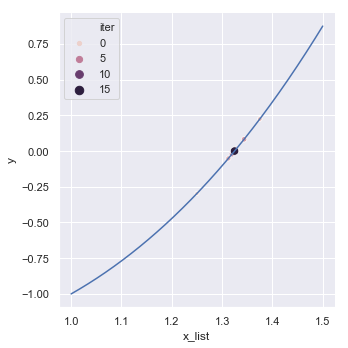

In [5]:
# saeborn绘图
x = np.linspace(a,b,1000)
y = fun(x)
fun_xy = pd.DataFrame({'x':x,'y':y}) # 用于绘制f(x)
sns.set(color_codes=True)
sns.relplot(x='x',y='y',kind='line',data=fun_xy)
# 绘制每次迭代的误差点
corr = np.arange(len(x_list))
df2 = pd.DataFrame({'x_list':x_list,'y':fun(x_list),'iter':corr})
sns.scatterplot(x='x_list',y='y',size='iter',hue='iter',data=df2)
# sns.lineplot(x=[a,b],y=[0,0]) #坐标


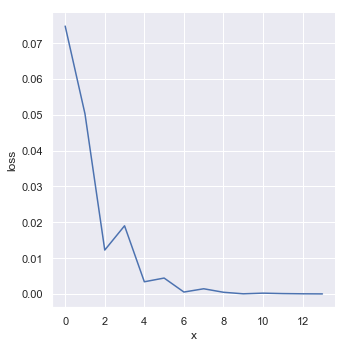

In [7]:
# 绝对误差
loss = np.abs(x_best - x_list)
x = np.arange(len(loss))
sns.relplot(x='x',y='loss',kind='line',data=pd.DataFrame(dict(x=x,loss=loss)))